# Data Analysis
explore decisions 2010-2020 concerning Strafsachen (criminal cases) from Bundesgerichtshof (Federal Court of Justice) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

In [3]:
df = pd.read_json('data/dataframes/restructured_bgh_decisions.json', orient='columns', encoding='utf-8')

In [4]:
df

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende
0,2 ARs 569/09,20100113,JURE100055051,BGH,2. Strafsenat,Beschluss,Jugendgerichtsverfahren: Abgabe an das nach Wo...,[Für die Untersuchung und Entscheidung der Sac...,[Die Abgabe durch das Amtsgericht Darmstadt ge...
1,3 StR 500/09,20100113,JURE100056016,BGH,3. Strafsenat,Beschluss,Betrug: Erforderliche Urteilsfeststellungen zu...,[1. Auf die Revision des Angeklagten wird das ...,[Das Landgericht hat den Angeklagten wegen Bet...
2,5 StR 507/09,20100126,JURE100056026,BGH,5. Strafsenat,Beschluss,Gesamtstrafenbildung: Aufhebung der Gesamtstra...,[Auf die Revision des Angeklagten wird das Urt...,[Das Landgericht hat den Angeklagten wegen bes...
3,5 StR 509/09,20100126,JURE100056027,BGH,5. Strafsenat,Beschluss,Betäubungsmitteleinfuhr: Vollendete Einfuhr zu...,[1. Auf die Revision des Angeklagten wird das ...,"[None, Das Landgericht hat den Angeklagten weg..."
4,3 StR 502/09,20100121,JURE100057396,BGH,3. Strafsenat,Beschluss,Unterbringung in einer Entziehungsanstalt: Abs...,[I. 1. Auf die Revision des Angeklagten T. wir...,[Das Landgericht hat den Angeklagten T. wegen ...
...,...,...,...,...,...,...,...,...,...
5821,4 StR 282/17,20170928,KORE634632017,BGH,4. Strafsenat,Urteil,Rücktritt vom Versuch eines Tötungsdelikts: Fr...,[1. Auf die Revisionen der Staatsanwaltschaft ...,[Das Landgericht hat den Angeklagten wegen gef...
5822,2 StR 217/19,20191113,KORE634712019,BGH,2. Strafsenat,Urteil,Jugendstrafverfahren: jugendspezifische Bestim...,[Die Revision des Angeklagten gegen das Urteil...,[Das Landgericht hat den Angeklagten wegen Tot...
5823,2 StR 447/19,20191105,KORE634732019,BGH,2. Strafsenat,Beschluss,Berücksichtigung von Einziehung bei Strafzumes...,[1. Auf die Revision des Angeklagten wird das ...,[Das Landgericht hat den Angeklagten wegen une...
5824,3 StR 249/19,20191113,KORE634742019,BGH,3. Strafsenat,Beschluss,Formulierung des Antrags auf Einziehung im obj...,[1. Auf die Revision des Angeklagten wird das ...,[Das Landgericht hat den Angeklagten der Gründ...


# Dokumenttypen

Es gibt 6 verschiedene Dokumententypen: ['Beschluss' 'Urteil' 'Vorlagebeschluss' 'EuGH-Vorlage' 'Entscheidung'
 'Verfügung']. Insgesamt 1277 Urteile, 4526 Beschlüsse, 1 Entscheidung, 2 Verfügungen, 11 Vorlagebeschlüsse, 9 EuGH-Vorlagen.

In [12]:
unique_values_doktyp = df.doktyp.unique()
unique_values_doktyp

array(['Beschluss', 'Urteil', 'Vorlagebeschluss', 'EuGH-Vorlage',
       'Entscheidung', 'Verfügung'], dtype=object)

In [13]:
anz_urteil = df[df.doktyp == 'Urteil'].shape[0]
anz_urteil

1277

In [14]:
anz_beschluss = df[df.doktyp == 'Beschluss'].shape[0]
anz_beschluss

4526

In [15]:
anz_entscheidung = df[df.doktyp == 'Entscheidung'].shape[0]
anz_entscheidung

1

In [16]:
anz_verfuegung = df[df.doktyp == 'Verfügung'].shape[0]
anz_verfuegung

2

In [17]:
anz_vorlagebeschluss = df[df.doktyp == 'Vorlagebeschluss'].shape[0]
anz_vorlagebeschluss

11

In [18]:
anz_eughvorlage = df[df.doktyp == 'EuGH-Vorlage'].shape[0]
anz_eughvorlage

9

# Spruchkörper

Es gibt 6 verschiedene Spruchkörper: ['2. Strafsenat' '3. Strafsenat' '5. Strafsenat' '4. Strafsenat'
 '1. Strafsenat' '6. Strafsenat']. 1245 mal 1. Strafsenat, 1255 mal 2. Strafsenat, 1290 mal 3. Strafsenat, 1195 mal 4. Strafsenat, 835 mal 5. Strafsenat, 6 mal 6. Stafsenat. 

In [19]:
unique_values_spruchkoerper = df.spruchkoerper.unique()
unique_values_spruchkoerper

array(['2. Strafsenat', '3. Strafsenat', '5. Strafsenat', '4. Strafsenat',
       '1. Strafsenat', '6. Strafsenat'], dtype=object)

In [20]:
anz_ersterStrSen = df[df.spruchkoerper == '1. Strafsenat'].shape[0]
anz_ersterStrSen

1245

In [21]:
anz_zweiterStrSen = df[df.spruchkoerper == '2. Strafsenat'].shape[0]
anz_zweiterStrSen

1255

In [22]:
anz_dritterStrSen = df[df.spruchkoerper == '3. Strafsenat'].shape[0]
anz_dritterStrSen

1290

In [23]:
anz_vierterStrSen = df[df.spruchkoerper == '4. Strafsenat'].shape[0]
anz_vierterStrSen

1195

In [24]:
anz_fuenfterStrSen = df[df.spruchkoerper == '5. Strafsenat'].shape[0]
anz_fuenfterStrSen

835

In [25]:
anz_sechsterStrSen = df[df.spruchkoerper == '6. Strafsenat'].shape[0]
anz_sechsterStrSen

6

# fehlende Daten

In 198 Fällen fehlen die Titel. Die anderen Kategorien / Spalten sind vollständig belegt. (Bemerkung: stimmt nicht, wie sich später zeigt: Text sind auch leer)

In [26]:
len(np.where(pd.isnull(df))[0])

198

In [27]:
np.where(pd.isnull(df))

(array([ 378,  392,  400,  499,  517,  544,  560,  562,  660,  680,  686,
         716,  725,  744,  755,  774,  778,  779,  787,  791,  795,  816,
         820,  830,  850,  851,  852,  853,  863,  868,  903,  935,  968,
         978, 1387, 1404, 1430, 1509, 1546, 1667, 1682, 1694, 1696, 1730,
        1740, 1745, 1748, 1769, 1781, 1786, 1795, 1819, 1821, 1836, 1840,
        1843, 1845, 1846, 1867, 1871, 1876, 1883, 1889, 1895, 1972, 1983,
        1986, 2028, 2105, 2266, 2300, 2346, 2369, 2658, 2667, 2676, 2679,
        2680, 2685, 2694, 2698, 2713, 2758, 2770, 2777, 2781, 2782, 2788,
        2795, 2803, 2812, 2820, 2826, 2840, 2842, 2846, 2914, 2928, 2952,
        2969, 2997, 3086, 3325, 3329, 3348, 3363, 3434, 3493, 3627, 3631,
        3642, 3645, 3651, 3677, 3679, 3707, 3723, 3732, 3737, 3752, 3759,
        3761, 3765, 3777, 3817, 3829, 3831, 3834, 3848, 3862, 3871, 3899,
        4104, 4192, 4401, 4420, 4495, 4541, 4551, 4580, 4685, 4714, 4716,
        4717, 4718, 4724, 4725, 4728, 

In [31]:
print(df.iloc[378, 6])

None


# Plotversuche

<AxesSubplot:xlabel='spruchkoerper', ylabel='count'>

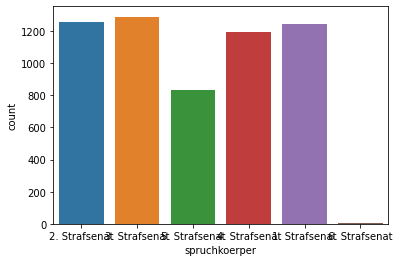

In [32]:
sns.countplot(df.spruchkoerper)

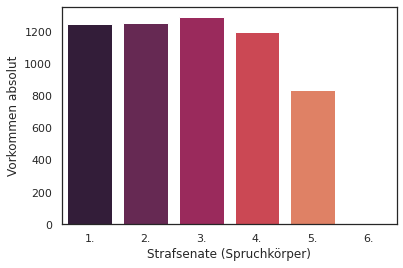

In [35]:
f = plt.figure()
sns.set(style="white", context="notebook")
x = ["1.", "2.", "3.","4.", "5.", "6."]
y = [anz_ersterStrSen, anz_zweiterStrSen, anz_dritterStrSen, anz_vierterStrSen, anz_fuenfterStrSen, anz_sechsterStrSen]
ax = sns.barplot(x=x, y=y, palette="rocket")
ax.set(xlabel='Strafsenate (Spruchkörper)', ylabel='Vorkommen absolut')

plt.show()

f.savefig("images/plots/strafsenate.png", bbox_inches="tight", dpi=600)

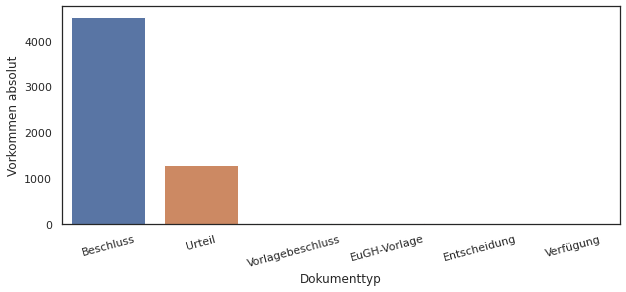

In [36]:
plt.figure(figsize=(10,4))
x2 = unique_values_doktyp
y2 = [anz_beschluss, anz_urteil, anz_vorlagebeschluss, anz_eughvorlage, anz_entscheidung, anz_verfuegung]
ax2 = sns.barplot(x=x2, y=y2)
ax2.set(xlabel='Dokumenttyp', ylabel='Vorkommen absolut')
plt.xticks(rotation=15)
plt.show()

<AxesSubplot:>

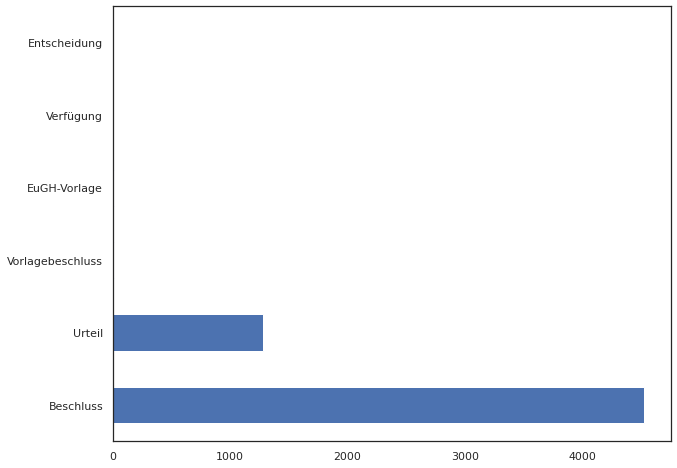

In [37]:
df['doktyp'].value_counts().plot(kind='barh', figsize=(10,8))

# Entscheidungsdatum

In [38]:
unique_values_datum = df.datum.unique()

In [39]:
print(len(unique_values_datum))

1520


In [40]:
type(df.datum[0])

numpy.int64

In [41]:
# datum in df in datumsformat umwandeln
df['datum'] = df['datum'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [42]:
df

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende
0,2 ARs 569/09,2010-01-13,JURE100055051,BGH,2. Strafsenat,Beschluss,Jugendgerichtsverfahren: Abgabe an das nach Wo...,[Für die Untersuchung und Entscheidung der Sac...,[Die Abgabe durch das Amtsgericht Darmstadt ge...
1,3 StR 500/09,2010-01-13,JURE100056016,BGH,3. Strafsenat,Beschluss,Betrug: Erforderliche Urteilsfeststellungen zu...,[1. Auf die Revision des Angeklagten wird das ...,[Das Landgericht hat den Angeklagten wegen Bet...
2,5 StR 507/09,2010-01-26,JURE100056026,BGH,5. Strafsenat,Beschluss,Gesamtstrafenbildung: Aufhebung der Gesamtstra...,[Auf die Revision des Angeklagten wird das Urt...,[Das Landgericht hat den Angeklagten wegen bes...
3,5 StR 509/09,2010-01-26,JURE100056027,BGH,5. Strafsenat,Beschluss,Betäubungsmitteleinfuhr: Vollendete Einfuhr zu...,[1. Auf die Revision des Angeklagten wird das ...,"[None, Das Landgericht hat den Angeklagten weg..."
4,3 StR 502/09,2010-01-21,JURE100057396,BGH,3. Strafsenat,Beschluss,Unterbringung in einer Entziehungsanstalt: Abs...,[I. 1. Auf die Revision des Angeklagten T. wir...,[Das Landgericht hat den Angeklagten T. wegen ...
...,...,...,...,...,...,...,...,...,...
5821,4 StR 282/17,2017-09-28,KORE634632017,BGH,4. Strafsenat,Urteil,Rücktritt vom Versuch eines Tötungsdelikts: Fr...,[1. Auf die Revisionen der Staatsanwaltschaft ...,[Das Landgericht hat den Angeklagten wegen gef...
5822,2 StR 217/19,2019-11-13,KORE634712019,BGH,2. Strafsenat,Urteil,Jugendstrafverfahren: jugendspezifische Bestim...,[Die Revision des Angeklagten gegen das Urteil...,[Das Landgericht hat den Angeklagten wegen Tot...
5823,2 StR 447/19,2019-11-05,KORE634732019,BGH,2. Strafsenat,Beschluss,Berücksichtigung von Einziehung bei Strafzumes...,[1. Auf die Revision des Angeklagten wird das ...,[Das Landgericht hat den Angeklagten wegen une...
5824,3 StR 249/19,2019-11-13,KORE634742019,BGH,3. Strafsenat,Beschluss,Formulierung des Antrags auf Einziehung im obj...,[1. Auf die Revision des Angeklagten wird das ...,[Das Landgericht hat den Angeklagten der Gründ...


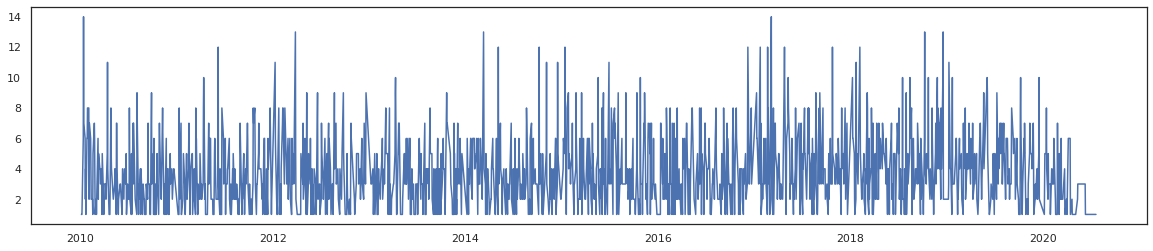

In [43]:
f2 = plt.figure(figsize=(20,4))
plt.plot(df['datum'].value_counts().sort_index())

f2.savefig("images/plots/entscheidungsdaten.png", bbox_inches="tight", dpi=600)

# Tenor

None aus Tenorlisten entfernen

In [44]:
def filterNone(liste: list):
    return list(filter(None, liste))

style information aus Tenor entfernen

In [45]:
def filterStyle(liste: list):
    for i, item in enumerate(liste):
        if type(item) == dict and "#text" in item:
            liste[i] = item["#text"]
        if type(item) == dict and "#text" not in item:
            liste[i] = None
    return liste

Filterfunktionen auf data frame anwenden

In [46]:
df["tenor"] = df["tenor"].apply(filterStyle).apply(filterNone)

Beispiel für gefilterten Tenor

In [47]:
df.iloc[4003].tenor

['1. Die Revision des Angeklagten I.\xa0gegen das Urteil des Landgerichts Berlin vom 14. Mai 2009 wird nach § 349 Abs. 2 StPO als unbegründet verworfen. Der Beschwerdeführer hat die Kosten seines Rechtsmittels zu tragen.',
 '2. Auf die Revision des Angeklagten Q.\xa0wird das vorgenannte Urteil, soweit es ihn betrifft, nach § 349 Abs. 4 StPO mit den zugehörigen Feststellungen aufgehoben. Die Sache wird insoweit zu erneuter Verhandlung und Entscheidung, auch über die Kosten des Rechtsmittels, an eine andere Strafkammer des Landgerichts zurückverwiesen.']

Listenelemente in Tenor zu einem Tenortext zusammenführen

In [48]:
def concatenateTenor(tenor_list: list):
    return " ".join(tenor_list)

Text bereinigen: "\xa0" entfernen

In [49]:
def cleanTenorTxt(tenor_text: str):
    #return tenor_text.replace("\xa0", " ")
    return re.sub(r"[\xa0]+", " ", tenor_text)

Anwenden auf Dataframe. Listen in Text zusammenführen, anschließend Text säubern

In [50]:
df["tenor"] = df["tenor"].apply(concatenateTenor).apply(cleanTenorTxt)

2 Beispiele für gesäuberten Tenor

In [51]:
df.iloc[5].tenor

'Die Revisionen der Angeklagten gegen das Urteil des Landgerichts Bielefeld vom 18. Mai 2009 werden als unbegründet verworfen, da die Nachprüfung des Urteils auf Grund der Revisionsrechtfertigungen im Ergebnis keinen Rechtsfehler zum Nachteil der Angeklagten ergeben hat (§ 349 Abs. 2 StPO). Es wird davon abgesehen, den Angeklagten D. und H. die Kosten und gerichtlichen Auslagen ihrer Rechtsmittel aufzuerlegen. Jedoch werden ihnen, ebenso wie der Angeklagten B., die ihrerseits die Kosten ihres Rechtsmittels zu tragen hat, die dem Nebenkläger im Revisionsverfahren entstandenen notwendigen Auslagen auferlegt. Ergänzend zu den Ausführungen des Generalbundesanwalts bemerkt der Senat: Bei keinem der drei Angeklagten ist das Landgericht von mittäterschaftlichem Zusammenwirken ausgegangen. Aus der - für sich genommen missverständlichen - Formulierung, der Angeklagten B. seien auch die durch die Tritte des Angeklagten H. verursachten Kopfverletzungen als vorsätzlich verursacht zuzurechnen (UA 2

In [52]:
df.iloc[193].tenor

'Die Revision des Angeklagten gegen das Urteil des Landgerichts Bonn vom 25. Mai 2011 wird mit der Maßgabe als unbegründet verworfen, dass die Urteilsformel dahin ergänzt wird, dass die in Griechenland erlittene Auslieferungshaft im Verhältnis 1 : 1 auf die erkannte Strafe angerechnet wird. Im Übrigen hat die Nachprüfung des Urteils auf Grund der Revisionsrechtfertigung keinen Rechtsfehler zum Nachteil des Angeklagten ergeben. Der Beschwerdeführer hat die Kosten des Rechtsmittels und die der Nebenklägerin im Revisionsverfahren entstandenen notwendigen Auslagen zu tragen. Ergänzend bemerkt der Senat: Zwar verstößt es in der Regel gegen das Doppelverwertungsverbot des § 46 Abs. 3 StGB, wenn der Umstand, dass der Angeklagte mit direktem Tötungsvorsatz gehandelt hat, als solcher straferschwerend verwertet wird, weil damit nur der Normalfall des § 212 StGB gekennzeichnet wird (BGHR StGB § 46 Abs. 3 Tötungsvorsatz 1, 3, 4, 5; BGH NStZ 2008, 624; aA S/S/W-StGB/Eschelbach § 46 Rn. 185). Dies g

# Gründe

In [53]:
df.iloc[193].gruende

[None]

In [54]:
df.iloc[4].gruende

['Das Landgericht hat den Angeklagten T.\xa0wegen bandenmäßigen Handeltreibens mit Betäubungsmitteln in nicht geringer Menge in 13 Fällen zu der Gesamtfreiheitsstrafe von sechs Jahren und acht Monaten verurteilt. Den Angeklagten Ö.\xa0hat es wegen bandenmäßigen Handeltreibens mit Betäubungsmitteln in nicht geringer Menge in acht Fällen, Handeltreibens mit Betäubungsmitteln in nicht geringer Menge in 3 Fällen sowie wegen schweren Menschenhandels zum Zweck der sexuellen Ausbeutung in Tateinheit mit schwerem Menschenhandel zum Zweck der sexuellen Ausbeutung zur Gesamtfreiheitsstrafe von sieben Jahren und acht Monaten verurteilt. Ferner hat das Landgericht die Unterbringung des Angeklagten Ö.\xa0in einer Entziehungsanstalt angeordnet und bestimmt, dass die Freiheitsstrafe für die Dauer von einem Jahr und zehn Monaten vor der Unterbringung zu vollziehen ist.',
 None,
 'Die Revision des Angeklagten Ö.\xa0rügt allgemein die Verletzung materiellen Rechts. Der Angeklagte T.\xa0wendet sich ebenf

In 443 Fällen ist "Gründe" leer.

In [55]:
def checkForEmptyList(liste: list):
    return all(v is None for v in liste)

In [56]:
empties = df["gruende"].apply(checkForEmptyList)

In [57]:
empties.sum()

443

In [58]:
np.where(empties)[0]

array([   5,   11,   23,   25,   66,   71,   79,   91,   98,  105,  108,
        117,  128,  132,  144,  149,  154,  164,  191,  192,  193,  226,
        233,  250,  261,  264,  276,  333,  350,  357,  406,  419,  433,
        452,  456,  495,  498,  500,  511,  543,  625,  648,  663,  697,
        698,  709,  712,  715,  731,  760,  764,  765,  803,  808,  811,
        821,  827,  830,  838,  856,  872,  882,  883,  891,  900,  906,
        933,  939,  976,  979,  993,  997, 1000, 1002, 1005, 1015, 1022,
       1037, 1041, 1044, 1050, 1054, 1061, 1065, 1085, 1097, 1099, 1103,
       1105, 1108, 1111, 1135, 1137, 1165, 1198, 1208, 1215, 1218, 1231,
       1232, 1240, 1244, 1248, 1255, 1261, 1276, 1280, 1323, 1332, 1336,
       1341, 1353, 1383, 1393, 1394, 1396, 1407, 1412, 1441, 1452, 1494,
       1506, 1526, 1528, 1539, 1636, 1651, 1660, 1662, 1675, 1681, 1695,
       1704, 1716, 1736, 1738, 1745, 1753, 1761, 1827, 1836, 1838, 1847,
       1854, 1910, 1944, 1975, 1991, 2004, 2020, 20

In [59]:
def extract_values(obj, key):
    """Pull all values of specified key from nested JSON."""
    arr = []

    def extract(obj, arr, key):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr, key)
                elif k == key:
                    arr.append(v)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    results = extract(obj, arr, key)
    return results

In [60]:
def filterStyleDeep(liste: list):
    for i, item in enumerate(liste):
        if type(item) == dict:
            #liste[i] = item["#text"]
            values = extract_values(item, "#text")
            liste[i] = " ".join(values)
        
    return liste

In [61]:
df["gruende"] = df["gruende"].apply(filterStyleDeep).apply(filterNone)

In [62]:
df["gruende"] = df["gruende"].apply(concatenateTenor).apply(cleanTenorTxt)

Save dataframe to json file:

In [63]:
df.to_json("data/dataframes/df.json")

Load dataframe from df.json

In [65]:
data = pd.read_json('data/dataframes/df.json', orient='columns', encoding='utf-8')

In [66]:
data
# datum ist in unleserlichem Format..
# 20100113 -> 2010-01-13 -> 1263340800000

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende
0,2 ARs 569/09,1263340800000,JURE100055051,BGH,2. Strafsenat,Beschluss,Jugendgerichtsverfahren: Abgabe an das nach Wo...,Für die Untersuchung und Entscheidung der Sach...,Die Abgabe durch das Amtsgericht Darmstadt gem...
1,3 StR 500/09,1263340800000,JURE100056016,BGH,3. Strafsenat,Beschluss,Betrug: Erforderliche Urteilsfeststellungen zu...,1. Auf die Revision des Angeklagten wird das U...,Das Landgericht hat den Angeklagten wegen Betr...
2,5 StR 507/09,1264464000000,JURE100056026,BGH,5. Strafsenat,Beschluss,Gesamtstrafenbildung: Aufhebung der Gesamtstra...,Auf die Revision des Angeklagten wird das Urte...,Das Landgericht hat den Angeklagten wegen beso...
3,5 StR 509/09,1264464000000,JURE100056027,BGH,5. Strafsenat,Beschluss,Betäubungsmitteleinfuhr: Vollendete Einfuhr zu...,1. Auf die Revision des Angeklagten wird das U...,Das Landgericht hat den Angeklagten wegen uner...
4,3 StR 502/09,1264032000000,JURE100057396,BGH,3. Strafsenat,Beschluss,Unterbringung in einer Entziehungsanstalt: Abs...,I. 1. Auf die Revision des Angeklagten T. wird...,Das Landgericht hat den Angeklagten T. wegen b...
...,...,...,...,...,...,...,...,...,...
5821,4 StR 282/17,1506556800000,KORE634632017,BGH,4. Strafsenat,Urteil,Rücktritt vom Versuch eines Tötungsdelikts: Fr...,1. Auf die Revisionen der Staatsanwaltschaft u...,Das Landgericht hat den Angeklagten wegen gefä...
5822,2 StR 217/19,1573603200000,KORE634712019,BGH,2. Strafsenat,Urteil,Jugendstrafverfahren: jugendspezifische Bestim...,Die Revision des Angeklagten gegen das Urteil ...,Das Landgericht hat den Angeklagten wegen Tots...
5823,2 StR 447/19,1572912000000,KORE634732019,BGH,2. Strafsenat,Beschluss,Berücksichtigung von Einziehung bei Strafzumes...,1. Auf die Revision des Angeklagten wird das U...,Das Landgericht hat den Angeklagten wegen uner...
5824,3 StR 249/19,1573603200000,KORE634742019,BGH,3. Strafsenat,Beschluss,Formulierung des Antrags auf Einziehung im obj...,1. Auf die Revision des Angeklagten wird das U...,Das Landgericht hat den Angeklagten der Gründu...


In [67]:
# Datum zurückkonvertieren
newTimeString = datetime.datetime.utcfromtimestamp(1263340800)#.strftime('%I:%M %p %b. %d, %Y')

In [68]:
newTimeString

datetime.datetime(2010, 1, 13, 0, 0)

In [69]:
type(data.datum[9])

numpy.int64

In [70]:
data.iloc[5].tenor

'Die Revisionen der Angeklagten gegen das Urteil des Landgerichts Bielefeld vom 18. Mai 2009 werden als unbegründet verworfen, da die Nachprüfung des Urteils auf Grund der Revisionsrechtfertigungen im Ergebnis keinen Rechtsfehler zum Nachteil der Angeklagten ergeben hat (§ 349 Abs. 2 StPO). Es wird davon abgesehen, den Angeklagten D. und H. die Kosten und gerichtlichen Auslagen ihrer Rechtsmittel aufzuerlegen. Jedoch werden ihnen, ebenso wie der Angeklagten B., die ihrerseits die Kosten ihres Rechtsmittels zu tragen hat, die dem Nebenkläger im Revisionsverfahren entstandenen notwendigen Auslagen auferlegt. Ergänzend zu den Ausführungen des Generalbundesanwalts bemerkt der Senat: Bei keinem der drei Angeklagten ist das Landgericht von mittäterschaftlichem Zusammenwirken ausgegangen. Aus der - für sich genommen missverständlichen - Formulierung, der Angeklagten B. seien auch die durch die Tritte des Angeklagten H. verursachten Kopfverletzungen als vorsätzlich verursacht zuzurechnen (UA 2

In [71]:
data.iloc[5].gruende

''

In [72]:
data.iloc[387]

az                                                    1 StR 219/14
datum                                                1416355200000
doknr                                                JURE140020222
gertyp                                                         BGH
spruchkoerper                                        1. Strafsenat
doktyp                                                   Beschluss
titel            Strafverfahren wegen Steuerhinterziehung: Unbe...
tenor            Auf die Revision der Angeklagten wird das Urte...
gruende          Das Landgericht hat die Angeklagte S. wegen St...
Name: 387, dtype: object

In [73]:
np.where(data["az"] == "1 StR 312/13")

(array([1303]),)

In [74]:
data.iloc[1303]

az                                                    1 StR 312/13
datum                                                1380585600000
doknr                                                JURE140000285
gertyp                                                         BGH
spruchkoerper                                        1. Strafsenat
doktyp                                                   Beschluss
titel            Umsatzsteuerhinterziehung: Zeitpunkt für die Z...
tenor            1. Auf die Revision des Angeklagten wird das U...
gruende          Das Landgericht hat den Angeklagten wegen Steu...
Name: 1303, dtype: object

In [75]:
def checkForEmptyString(item):
    if item == "":
        return True
    else:
        return False    

gruende fehlt 443 mal

In [76]:
empties_gruende = data["gruende"].apply(checkForEmptyString)

In [77]:
empties_gruende.sum()

443

Tenor fehlt 1 mal

In [78]:
empties_tenor = data["tenor"].apply(checkForEmptyString)

In [79]:
empties_tenor.sum()

1

In [80]:
np.where(empties_tenor)

(array([3679]),)

In [81]:
data.iloc[3679]

az                 5 ARs 60/15
datum            1456876800000
doknr            KORE607042016
gertyp                     BGH
spruchkoerper    5. Strafsenat
doktyp               Beschluss
titel                     None
tenor                         
gruende                       
Name: 3679, dtype: object

titel fehlt 198 mal

In [82]:
np.where(pd.isna(data["titel"]))[0].shape

(198,)

In [83]:
np.where(pd.isna(data["titel"]))

(array([ 378,  392,  400,  499,  517,  544,  560,  562,  660,  680,  686,
         716,  725,  744,  755,  774,  778,  779,  787,  791,  795,  816,
         820,  830,  850,  851,  852,  853,  863,  868,  903,  935,  968,
         978, 1387, 1404, 1430, 1509, 1546, 1667, 1682, 1694, 1696, 1730,
        1740, 1745, 1748, 1769, 1781, 1786, 1795, 1819, 1821, 1836, 1840,
        1843, 1845, 1846, 1867, 1871, 1876, 1883, 1889, 1895, 1972, 1983,
        1986, 2028, 2105, 2266, 2300, 2346, 2369, 2658, 2667, 2676, 2679,
        2680, 2685, 2694, 2698, 2713, 2758, 2770, 2777, 2781, 2782, 2788,
        2795, 2803, 2812, 2820, 2826, 2840, 2842, 2846, 2914, 2928, 2952,
        2969, 2997, 3086, 3325, 3329, 3348, 3363, 3434, 3493, 3627, 3631,
        3642, 3645, 3651, 3677, 3679, 3707, 3723, 3732, 3737, 3752, 3759,
        3761, 3765, 3777, 3817, 3829, 3831, 3834, 3848, 3862, 3871, 3899,
        4104, 4192, 4401, 4420, 4495, 4541, 4551, 4580, 4685, 4714, 4716,
        4717, 4718, 4724, 4725, 4728, 

In [84]:
data.iloc[4724]

az                                         2 StR 495/12, GSSt 2/15
datum                                                1470700800000
doknr                                                KORE605032016
gertyp                                                         BGH
spruchkoerper                                        2. Strafsenat
doktyp                                                   Beschluss
titel                                                         None
tenor            Die Vorlage wird zurückgenommen. Fischer Krehl...
gruende                                                           
Name: 4724, dtype: object

Die anderen Kategorien / Spalten scheinen vollständig belegt

In [85]:
np.where(pd.isna(data["doktyp"]))

(array([], dtype=int64),)

In [86]:
np.where(pd.isna(data["spruchkoerper"]))

(array([], dtype=int64),)

In [87]:
np.where(pd.isna(data["az"]))

(array([], dtype=int64),)

## Länge der Texte

In [88]:
def getLengthOfText(text):
    if text:
        return len(text)
    else:
        return 0

In [89]:
len_titel = data["titel"].apply(getLengthOfText)

In [90]:
len_titel.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5816, 5817, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825],
           dtype='int64', length=5826)

In [91]:
len_tenor = data["tenor"].apply(getLengthOfText)

In [92]:
len_tenor.max()

15965

In [93]:
len_tenor.min()

0

In [94]:
len_tenor.mean()

669.4249914177824

In [95]:
len_gruende = data["gruende"].apply(getLengthOfText)

In [96]:
len_gruende.max()

132487

In [97]:
len_gruende.mean()

9304.9733951253

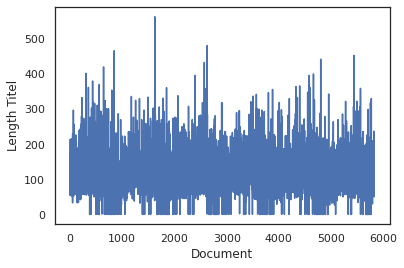

In [98]:
length = len_titel
document = len_titel.index
 
titel_plot = pd.DataFrame({"Document":document, "Length Titel":length})
 
sns.lineplot(x = "Document", y = "Length Titel", data=titel_plot)
plt.show()

In [99]:
df_txt_length = pd.DataFrame({'Document':data.index, 'titel':len_titel,'tenor':len_tenor, 'gruende': len_gruende})
df_txt_length.head()

,Document,titel,tenor,gruende
0,0,94,105,587
1,1,123,389,3403
2,2,110,500,4310
3,3,157,416,4962
4,4,124,1018,7273


<AxesSubplot:xlabel='Document', ylabel='titel'>

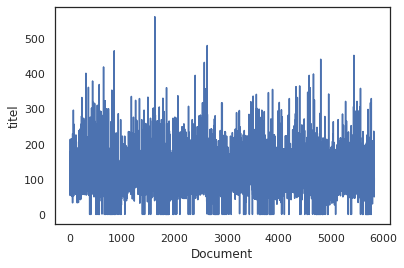

In [100]:
sns.lineplot('Document', 'titel', data=df_txt_length)

<AxesSubplot:>

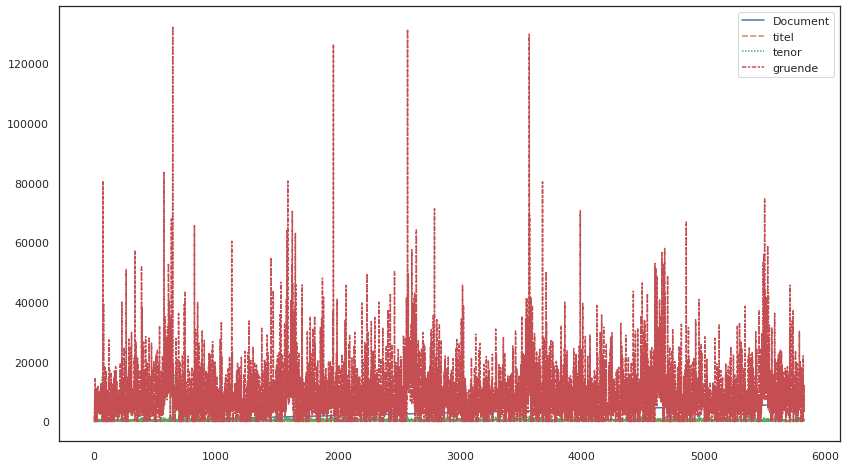

In [101]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df_txt_length)

<AxesSubplot:xlabel='Document', ylabel='value'>

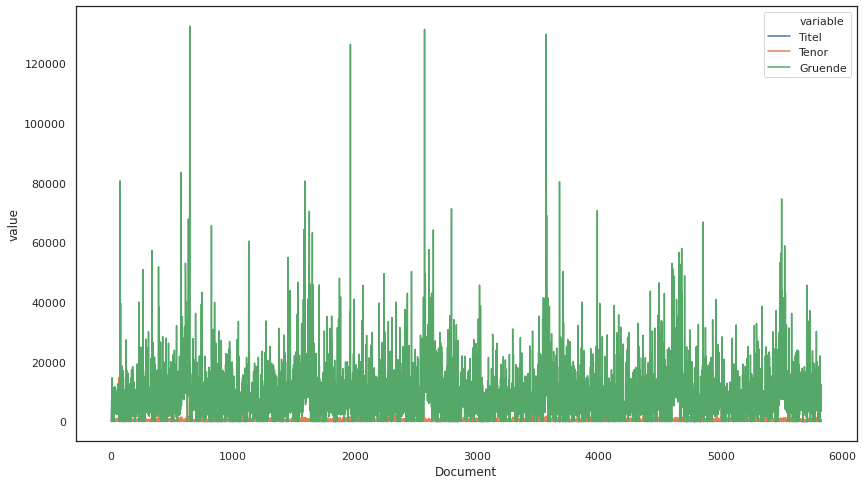

In [102]:
plt.figure(figsize=(14,8))

data_preproc = pd.DataFrame({
    'Document': data.index, 
    'Titel': len_titel,
    'Tenor': len_tenor,
    'Gruende': len_gruende})

sns.lineplot(x='Document', y='value', hue='variable', data=pd.melt(data_preproc, ['Document']))

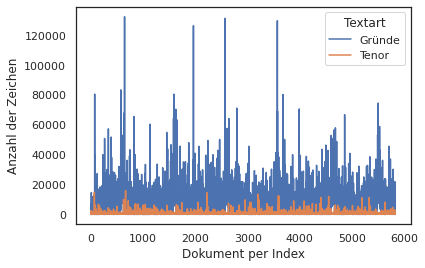

In [104]:
f3 = plt.figure()

data_preproc = pd.DataFrame({
    'Document': data.index, 
    'Gruende': len_gruende,
    'Tenor': len_tenor})

sns.lineplot(x='Document', y='value', hue='variable', legend=False, data=pd.melt(data_preproc, ['Document'])).set(xlabel='Dokument per Index', ylabel='Anzahl der Zeichen')
plt.legend(title="Textart",loc='upper right', labels=['Gründe', 'Tenor'])

f3.savefig("images/plots/textlaenge.png", bbox_inches="tight", dpi=600)